# Understanding Descriptive Statistics
Import the necessary libraries here:

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import random 
from scipy import stats
%matplotlib inline 

References: </br>
(1) https://www.geeksforgeeks.org/absolute-and-relative-frequency-in-pandas/ </br>
(2) https://www.geeksforgeeks.org/finding-mean-median-mode-in-python-without-libraries/  </br> 
(3) https://mashimo.wordpress.com/2013/07/06/quartiles-and-summary-statistics-in-python/ </br>

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [32]:
def roll_dice():
    sides = [1,2,3,4,5,6]
    return random.choices(sides, k = 10)

df = pd.DataFrame(roll_dice(),columns=['Result']) 
df['Roll'] = pd.Series([1,2,3,4,5,6,7,8,9,10])


#### 2.- Plot the results sorted by value.

In [33]:
df.sort_values(by=['Result']).reset_index()

,index,Result,Roll
0,9,1,10
1,7,2,8
2,8,2,9
3,6,3,7
4,3,5,4
5,5,5,6
6,0,6,1
7,1,6,2
8,2,6,3
9,4,6,5


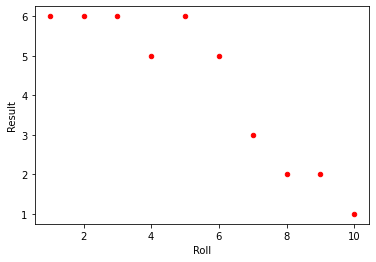

In [34]:
df.plot(kind='scatter', x = 'Roll', y = 'Result',color = 'r')

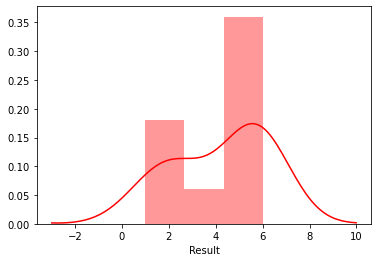

In [35]:
sns.distplot(df['Result'],bins= 3,color = 'r')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

 <font color='pink'>
1.3.1. Methodology: 
This question refers to absolute frequency, this is defined as the number of occurrences of a certian phenomenom, in this case the number of occurances (values) per dice roll. Therefore, in order to plot the absolute frequency I will create a frequency distribution table with the results and its absolute frequency. In order to plot the frequency I will create a pandas series, so the keys will be 'Results' and 'Frequency'
 </font> 

In [36]:
freq_table = pd.DataFrame(df['Result'].value_counts().sort_values())
freq_table.rename(columns = {'Result':'Frequency'})

,Frequency
3,1
1,1
5,2
2,2
6,4


In [ ]:
#M2-Q2, If I add .reset_index to add one more column and rename it as the result and frequency, 
#then I get a two dimensioal array and cant further perform the analys. 

In [37]:
#Creating Keys & Values 
result_keys = freq_table['Result'].keys() 
freq_vals = freq_table['Result'].values
frequency = pd.DataFrame({'Result': result_keys,'Frequency': freq_vals}) #classification is absolute frequency 
frequency

,Result,Frequency
0,3,1
1,1,1
2,5,2
3,2,2
4,6,4


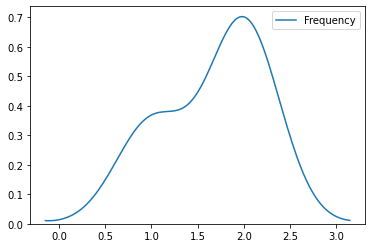

In [18]:
#I plot the frequency 
sns.kdeplot(frequency['Frequency'])

In [20]:
df.describe()

,Result,Roll
count,10.000000,10.00000
mean,3.700000,5.50000
std,1.766981,3.02765
min,1.000000,1.00000
25%,2.250000,3.25000
50%,3.500000,5.50000
75%,5.000000,7.75000
max,6.000000,10.00000


 <font color='pink'>
   1.2. Conclusions 
    </br>
The graph above seems to follow a Gaussuian distribution. It is slightly skewed to the right, this normal distribution is a variant of the most well known Gaussian statistical distribution.
The skew normal distribution with shape zero resembles the Normal Distribution, hence the latter can be regarded as a special case of the more generic skew normal distribution.
</font> 

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

 <font color='pink'>
2.1.1 Methodology 

The Mean is a point in a data set which is the average of all the data point we have in a data set. It is defined as arithmetic average of the data, therefore calculating the lenght of the set and the sum of the observatios is necessary. </font> 

In [38]:
#Creating the function
def mean_fc(x):
    avg = sum(x)/len(x)
    return avg

#Calling the function on the original DataSet
print("The average of the Dice Roll function 'Results' is", mean_fc(df['Result']) )
print("Confiriming  the above with the Python function, the result is", df['Result'].mean() )

#End

The average of the Dice Roll function 'Results' is 4.2
Confiriming  the above with the Python function, the result is 4.2


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

 <font color='pink'>
2.2.1 Methodology: 
I have already obtained the frequency distribuition table, or absolute frequency. I just use the previously created function and call it on the frequency table, "Frequency". </br>
    </font>

In [22]:
print("The average of the frequency distribution 'Frequency' is", mean_fc(frequency['Frequency']))
print("Confiriming the above with the Python function 'mean', the result is", frequency['Frequency'].mean() )

The average of the frequency distribution 'Frequency' is 1.6666666666666667
Confiriming the above with the Python function 'mean', the result is 1.6666666666666667


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 

**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

 <font color='pink'>
2.3.1 Methodology </br>
In order to answer this question, we need to recall that the median is the middle number in the data set, therefore I need to assign it to a variable and sort it before use. 
Since the question does not specify if the mean should be performed on the original results or the frequency it will be performed on the original set. 
    </font>

In [39]:

n_list = df['Result'].tolist()
n = len(n_list) 
n_list.sort() 

def median_fc(n_num): 
    if n % 2 == 0: 
        median1 = n_list[n//2] 
        median2 = n_list[n//2 - 1] 
        median = (median1 + median2)/2
    else: 
            median = n_list[n//2] 
    return print("Median is: " + str(median))

median_fc(n_list)
print("Confirming the above with the Python function 'median', the result is", df['Result'].median())

Median is: 5.0
Confirming the above with the Python function 'median', the result is 5.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

 <font color='pink'>
2.4.1. Methodology 

Quartiles in quantiles require the division of the data set in four equal sections. Considering that the second quartile (Q2) is the median, and (Q4) as the maximum. I would need to perform distannce calculations from Q1 to Q2 to obtain the lenght of the lower half and obtain the median of this lower half. In the same way the distance from Q2, or the median, to the maximum lenght of the data set or upper half's median would be  Q4. 

Another way to to express this, is presented in below. Note I described the set in order to guide the calculations. </br>
In Summary: </br>
a) The first quartile, also called the lower quartile: splits off the lowest quarter (25%)</br>
b) The data from the restsecond quartile also called the median: </br>
c) The third quartile, also called the upper quartile: splits off the highest quarter (25%) of data from the rest </br>


In [51]:
def quartiles(dataPoints):
    """
    the lower and upper quartile
    Arguments:
        dataPoints: a list of data points, int or float
    Returns:
        the first and the last quarter in the sorted list, a tuple of float or int
    """
    if not dataPoints:
        raise StatsError('no data points passed')
        
    sortedPoints = sorted(dataPoints)
    mid = len(sortedPoints) // 2 # uses the floor division to have integer returned
    
    if (len(sortedPoints) % 2 == 0):
        # even
        lowerQ = median_fc(sortedPoints[:mid])
        upperQ = median_fc(sortedPoints[mid:])
    else:
        # odd
        lowerQ = median_fc(sortedPoints[:mid])
        upperQ = median_fc(sortedPoints[mid+1:])
            
    return (lowerQ, upperQ)

print ("Summary statistics")
print ("First Quartile: ", quartiles(n_list)[0])
print ("Second Quartile   : ", median_fc(n_list))
print ("Third Quartile: ", quartiles(n_list)[1])

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [55]:
roll_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
roll_hundred.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [56]:
#First I check the summary of the Data, I use describe for gudinng purposes of the excercise.  
roll_hundred.describe()

,Unnamed: 0,roll,value
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,3.740000
std,29.011492,29.011492,1.703354
min,0.000000,0.000000,1.000000
25%,24.750000,24.750000,2.000000
50%,49.500000,49.500000,4.000000
75%,74.250000,74.250000,5.000000
max,99.000000,99.000000,6.000000


In [86]:
#I clean the data first, I notice there is an Unnamed:0 column, which is not bringing any value. 
#roll_hundred = roll_hundred.drop(columns=["Unnamed: 0"])
roll_hundred = roll_hundred.sort_values(by=["value"])
roll_hundred = roll_hundred.reset_index(drop=True)
roll_hundred.head(10)

,roll,value
0,0,1
1,26,1
2,97,1
3,3,1
4,89,1
5,56,1
6,82,1
7,73,1
8,9,1
9,47,1


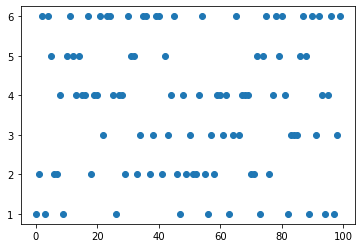

In [68]:
roll_hundred.sort_values(by='value')
plt.scatter(x=roll_hundred["roll"], y=roll_hundred["value"])

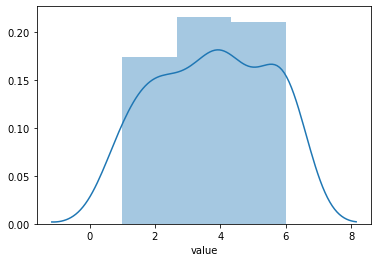

In [69]:
sns.distplot(roll_hundred['value'],bins= 3)

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [80]:
# your code here
mean_fc(roll_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [87]:
# your code here
frequency_2 = pd.crosstab(roll_hundred['value'],columns='frequency')
frequency_2.sort_values(by=["frequency"]).reset_index(drop=True)

col_0,frequency
0,12
1,12
2,14
3,17
4,22
5,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

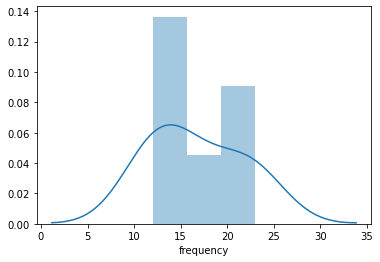

In [88]:
sns.distplot(frequency_2['frequency'],bins= 3)

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [90]:
roll_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
roll_thousand = roll_thousand.drop(columns=["Unnamed: 0"])
roll_thousand = roll_thousand.sort_values(by=["value"])
roll_thousand = roll_thousand.reset_index(drop=True)
roll_thousand.head()

,roll,value
0,564,1
1,922,1
2,560,1
3,213,1
4,214,1


In [91]:
frequency_3 = pd.crosstab(roll_thousand['value'],columns='frequency')
frequency_3.sort_values(by=["frequency"]).reset_index(drop=True)

col_0,frequency
0,149
1,166
2,167
3,168
4,175
5,175


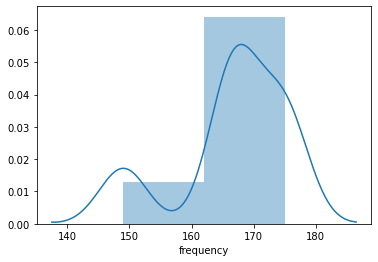

In [96]:
sns.distplot(frequency_3['frequency'],bins= 2)

In [ ]:
"""
As the data frame sizes increases, i.e. Population size the normal distribution is more evident. 
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [101]:
ages_data = pd.read_csv("../data/ages_population.csv")

ages_data = ages_data.sort_values(by=["observation"]).reset_index()
freq_dist_age = pd.DataFrame(ages_data["observation"].value_counts().reset_index())

ages_data.head(10)


,index,observation
0,489,1.0
1,209,1.0
2,301,2.0
3,451,2.0
4,338,4.0
5,696,5.0
6,447,5.0
7,18,6.0
8,550,6.0
9,202,7.0


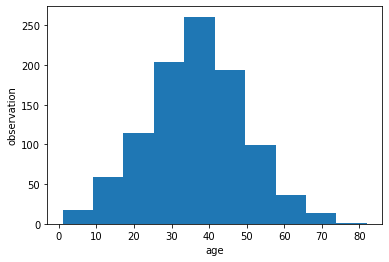

In [106]:
plt.hist(ages_data["observation"], bins=10)
plt.xlabel("age")
plt.ylabel("observation")
plt.show()


In [ ]:

"""
Based on the Graph above, I calculate the mean would be from 30 - 45 years. 

""""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [107]:
# your code here
ages_data["observation"].mean()

36.56

In [108]:
ages_data["observation"].std()

12.816499625976757

In [ ]:
"""
Close. 
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [109]:
ages_data2 = pd.read_csv("../data/ages_population2.csv")
ages_data2.head()


,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [258]:
ages_data2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [269]:
freq_table4 = ages_data2['observation'].value_counts() 

mykeys4 = freq_table4.keys()
myvals4 = freq_table4.values
freq_table4 = pd.DataFrame({'observation': mykeys4,'Frequency': myvals4})
freq_table4

,observation,Frequency
0,28.0,139
1,27.0,125
2,26.0,120
3,29.0,115
4,25.0,98
5,30.0,90
6,24.0,78
7,31.0,61
8,23.0,41
9,22.0,35


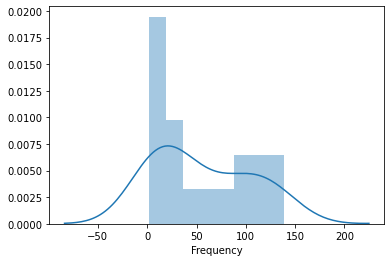

In [271]:
sns.distplot(freq_table4['Frequency'],bins= 8) #plotly #dask 

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The distributionn is closed to a normal distribution. 
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [272]:
# your code here
freq_table4["observation"].mean()

27.5

In [273]:
freq_table4["observation"].std()

5.338539126015656

In [ ]:
"""
the mean and stdv are lower, values are more concerntrated along the mean. 

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124758a30>]],
      dtype=object)

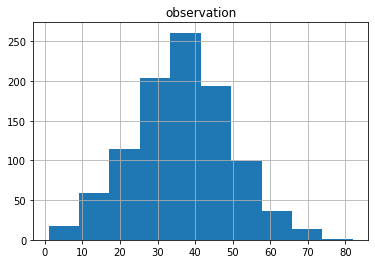

In [279]:
# your code here
ages3 = pd.read_csv('../data/ages_population.csv')
ages3.hist()

In [280]:
ages3 = ages3.sort_values(by=["observation"]).reset_index()
freq_dist5 = pd.DataFrame(ages3["observation"].value_counts().reset_index())

In [281]:
freq_table5= ages3['observation'].value_counts() 

mykeys5 = freq_table5.keys()
myvals5 = freq_table5.values
freq_table5 = pd.DataFrame({'observation': mykeys5,'Frequency': myvals5})
freq_table5

,observation,Frequency
0,39.0,45
1,41.0,36
2,30.0,34
3,35.0,33
4,43.0,32
...,...,...
67,69.0,1
68,70.0,1
69,4.0,1
70,71.0,1


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [282]:
# your code here
freq_table5.describe()

,observation,Frequency
count,72.000000,72.000000
mean,37.611111,13.888889
std,21.239450,11.261996
min,1.000000,1.000000
25%,19.750000,3.000000
50%,37.500000,11.500000
75%,55.250000,23.000000
max,82.000000,45.000000


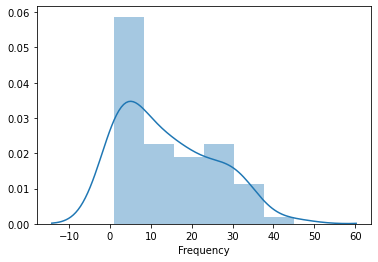

In [285]:
sns.distplot(freq_table5['Frequency'],bins= 6)

In [287]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [290]:
ages3.describe()

,index,observation
count,1000.000000,1000.0000
mean,499.500000,36.5600
std,288.819436,12.8165
min,0.000000,1.0000
25%,249.750000,28.0000
50%,499.500000,37.0000
75%,749.250000,45.0000
max,999.000000,82.0000


In [286]:
np.quantile(ages3["observation"], 0.9)


53.0

In [289]:
np.quantile(ages3["observation"], 0.3)

30.0

In [ ]:
"""
10% of the observation are situated around 53, which shows the skewness to the right 
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# Above

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""